## Gestion des API et des microservices

Dans ce chapitre, vous découvrirez les API et la gestion des microservices. Jusqu'à présent, nous avons déployé des applications ML qui servent d'API. Nous allons maintenant voir comment développer, organiser, gérer et servir des API. 

Vous apprendrez les principes de la conception d'API et de microservices pour l'inférence ML afin de pouvoir concevoir vos propres solutions ML personnalisées. 

Dans ce chapitre, nous allons apprendre par la pratique pendant que nous construisons un microservice à l'aide de FastAPI et Docker et le servons d'API. Pour cela, nous allons passer en revue les principes fondamentaux de la conception d'une API et d'un microservice pour un modèle de ML formé précédemment (au chapitre 4, Pipelines d'apprentissage automatique). Enfin, nous réfléchirons à certains principes clés, défis et astuces pour concevoir un microservice et une API robustes et évolutifs pour les environnements de test et de production. 

Les sujets suivants seront traités dans ce chapitre :

* Introduction aux API et aux microservices
* Le besoin de microservices pour le ML
* Old is gold – Microservices basés sur l'API REST•
* Mise en œuvre pratique du service d'un modèle de ML en tant qu'API
* Développer un microservice à l'aide de Docker
* Tester le service API

## Introduction aux API et aux microservices 

Les API et les microservices sont des outils puissants qui permettent à vos modèles ML (ML) de devenir utiles dans les systèmes de production ou hérités pour servir les modèles ou communiquer avec d'autres composants du système. À l'aide d'API et de microservices, vous pouvez concevoir une solution de ML robuste et évolutive pour répondre aux besoins de votre entreprise. Voyons ce que sont les API et les microservices et comment ils réalisent le potentiel de votre modèle dans le monde réel.

## What is an Application Programming Interface (API)?

Une API est la passerelle qui permet aux développeurs de communiquer avec une application. Les API permettent deux choses : 

* L'accès aux données d'une application
* L'utilisation des fonctionnalités d'une application 

En accédant et en communiquant avec les données et fonctionnalités des applications, les API ont permis à l'électronique, aux applications et aux pages Web du monde de communiquer entre elles afin de travailler ensemble pour accomplir des tâches commerciales ou opérationnelles.

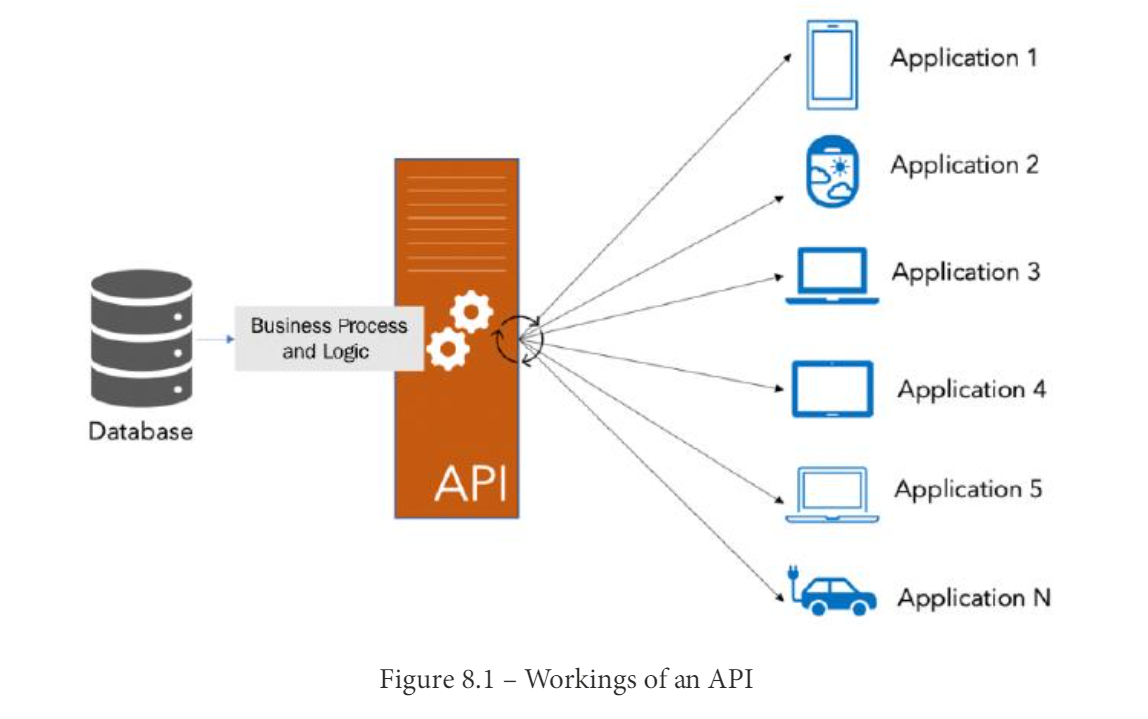

Sur la figure 8.1, nous pouvons voir le rôle d'une API car elle permet d'accéder aux données d'application (depuis la base de données) et de communiquer avec des tiers ou d'autres applications telles que des applications mobiles (pour les utilisateurs mobiles), des applications météo (sur mobile ou sur le Web ), voitures électriques, etc. Les API fonctionnent depuis l'aube des ordinateurs, dans le but de permettre la communication entre les applications. Au fil du temps, nous avons vu des développeurs parvenir à un consensus avec des protocoles tels que Simple Object Access Protocol (SOAP) et Representational State Transfer (REST) ​​au début des années 2000. Ces dernières années, une génération de nouveaux types de protocoles API a été développée, tels que Remote Procedure Call (RPC) et GraphQL, comme le montre le tableau suivant :

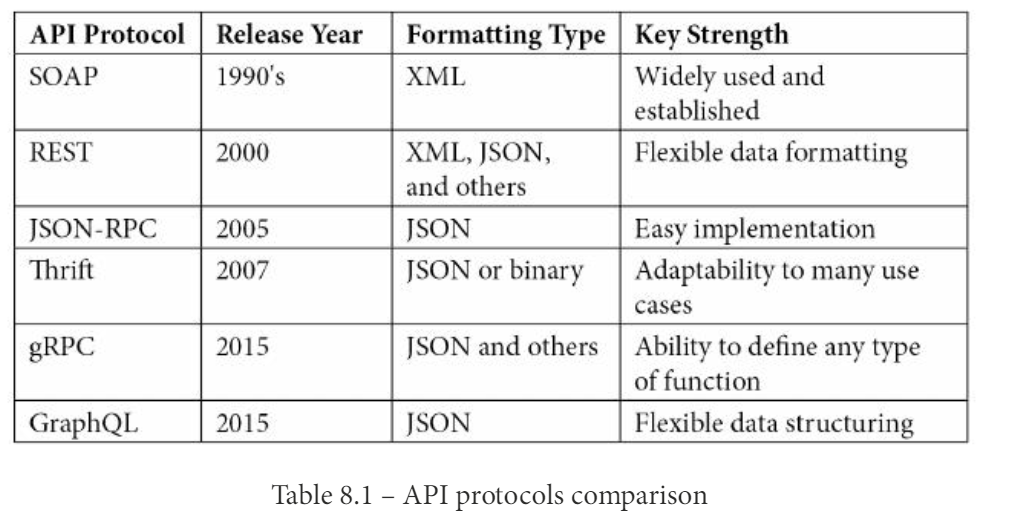

Il est utile de comprendre les protocoles API traditionnels si vous êtes un développeur d'applications (hébergées sur le cloud ou communiquant avec d'autres services). Il vous aide à concevoir vos API en fonction de vos besoins commerciaux ou fonctionnels. En tant que programmeur, estimez-vous chanceux d'avoir de nombreux protocoles API à votre disposition, car il y a 20 ans, seuls SOAP et REST étaient disponibles. Désormais, une variété de choix sont à votre disposition en fonction de vos besoins, par exemple, GraphQL, et JSON-RPC. Ces protocoles présentent divers avantages et inconvénients, ce qui permet de trouver facilement celui qui convient le mieux à votre situation

## MicroservicesLes 

microservices sont un moyen moderne de concevoir et de déployer des applications pour exécuter un service. Les microservices permettent des applications distribuées plutôt qu'une seule grande application monolithique où les fonctionnalités sont divisées en fragments plus petits (appelés microservices). Un microservice est une application individuelle dans une architecture de microservice. Cela est contraire aux architectures centralisées ou monolithiques, où toutes les fonctionnalités sont liées ensemble dans une seule grande application. Les microservices ont gagné en popularité grâce à l'architecture orientée services (SOA), une alternative au développement monolithique traditionnel (applications singulières et autosuffisantes)


Les microservices ont été massivement adoptés car ils permettent aux développeurs de développer, d'intégrer et de maintenir des applications en toute simplicité. En fin de compte, cela se résume au fait que les fonctionnalités individuelles sont traitées de manière indépendante, vous permettant dans un premier temps de développer une fonctionnalité individuelle d'un service étape par étape. Enfin, il permet de travailler indépendamment sur chaque fonctionnalité tout en intégrant l'ensemble du système pour orchestrer le service. De cette façon, vous pouvez l'ajouter, l'améliorer ou le corriger sans risquer de casser l'ensemble de l'application. Les microservices sont précieux pour les grandes entreprises car ils permettent aux équipes de travailler sur des choses isolées sans aucune organisation compliquée. Dans la figure 8.2, nous pouvons voir la différence entre les monolithes et les microservices. Les microservices permettent des applications distribuées par rapport aux monolithes, qui sont des applications non distribuées :

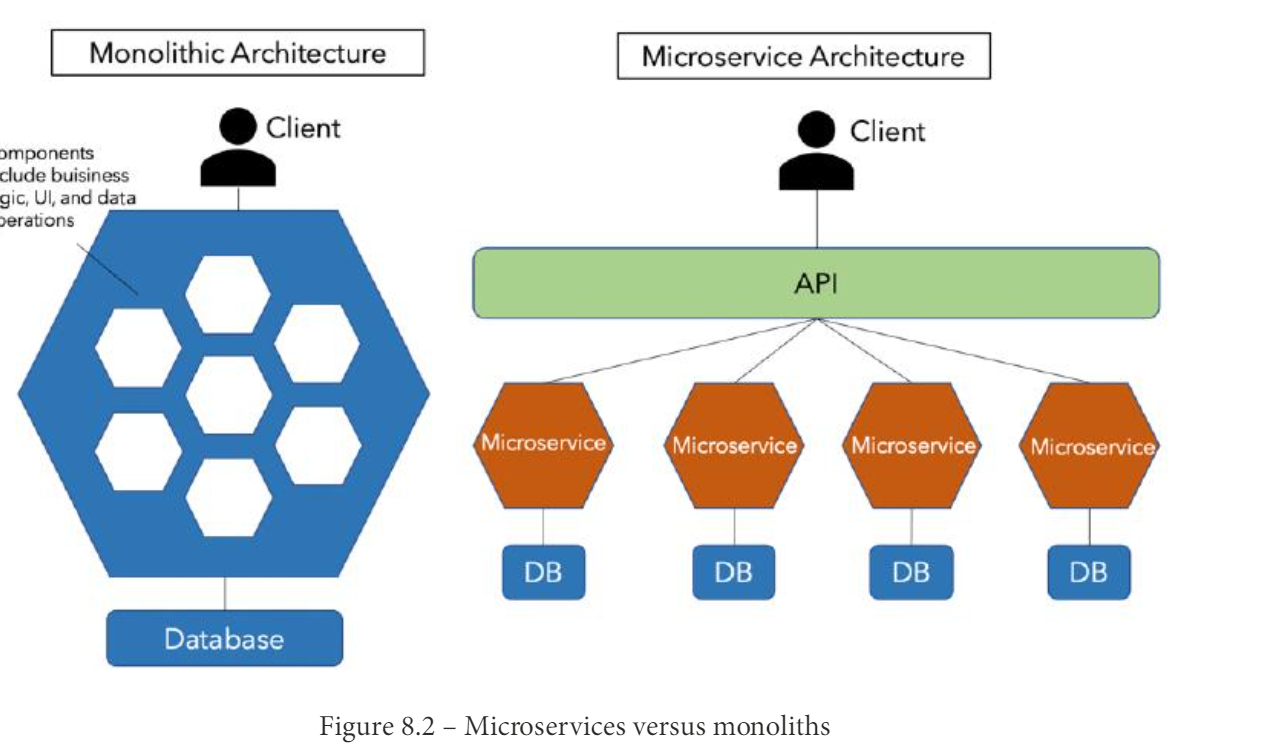

Les équipes de développement de logiciels sont habilitées à travailler de manière indépendante et dans le cadre de responsabilités de service bien comprises. L'architecture basée sur les microservices encourage les équipes de développement de logiciels à s'approprier leurs services ou modules. Un inconvénient possible de l'architecture basée sur les microservices est que si vous divisez une application en plusieurs parties, ces parties doivent impérativement communiquer efficacement afin de maintenir le service en cours d'exécution.

La relation entre les API et les microservices est fascinante car elle a deux côtés. En raison de l'architecture basée sur les microservices, une API est le résultat direct de la mise en œuvre de cette architecture dans votre application. Alors qu'en même temps, une API est un outil essentiel pour communiquer entre les services dans une architecture basée sur des microservices pour fonctionner efficacement. Jetons un coup d'œil à la section suivante, où nous passerons en revue quelques 
exemples d'application ML

## Le besoin de microservices pour le ML

Pour comprendre le besoin d'une architecture basée sur des microservices pour les applications de ML, examinons un cas d'utilisation hypothétique et passons en revue les différentes phases de développement d'une application de ML pour le cas d'utilisation

## Cas d'utilisation hypothétique

Une grande installation de réparation automobile a besoin d'une solution pour estimer le nombre de voitures dans l'installation et leurs positions précises. Un tas de caméras IP est installé dans les stations de réparation pour surveiller l'installation. Concevoir un système ML pour surveiller et gérer l'installation de réparation automobile

## Étape 1 - Preuve de concept (un monolithe) 

Un PoC rapide est développé dans un cas typique en utilisant les points de données disponibles et en appliquant le ML pour présenter et valider le cas d'utilisation et prouver aux parties prenantes de l'entreprise que le ML peut résoudre leurs problèmes ou améliorer leur entreprise. Dans notre cas d'utilisation hypothétique, une application Python monolithique est développée pour effectuer les opérations suivantes : 

* Récupère les flux de toutes les caméras 

* Détermine les positions des voitures (tête ou queue) à partir de chaque caméra 

* Agrége toutes les estimations dans un estimateur d'état de l'installation

Nous pouvons voir sur la figure 8.3, l'application est dockerisée et déployée sur le serveur :

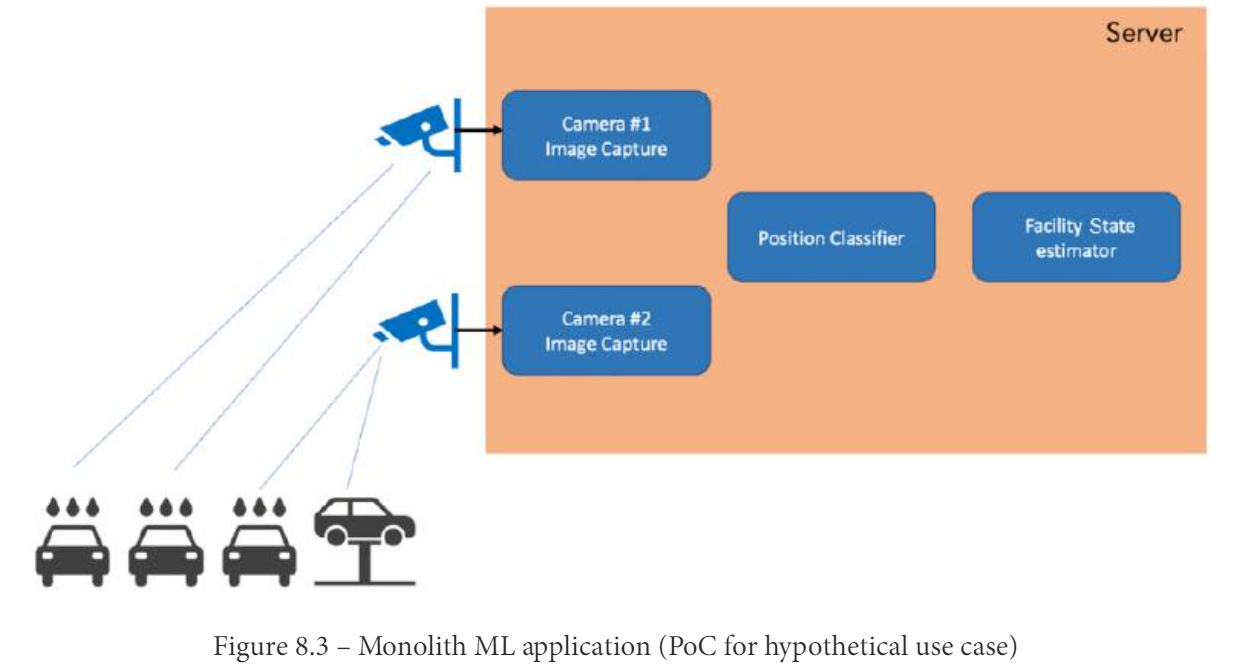

Toutes les caméras sont connectées à ce serveur via le réseau local. Les algorithmes pour l'estimation de la position des voitures et l'estimateur de l'état de l'installation fonctionnent mais doivent encore être améliorés, et dans l'ensemble, le PoC fonctionne. Cette application monolithique est très susceptible de planter en raison de l'instabilité des caméras, du réseau local et d'autres erreurs. De telles instabilités peuvent être mieux gérées par les microservices. Voyons cela en pratique à l'étape 2

## Étape 2 – Production (microservices) 

À cette étape, une application moins sujette aux plantages est essentielle pour exécuter en continu les opérations de surveillance de l'atelier de réparation automobile. Pour cette raison, une application monolithique est remplacée par une architecture basée sur des microservices, comme illustré à la figure 8.4 :


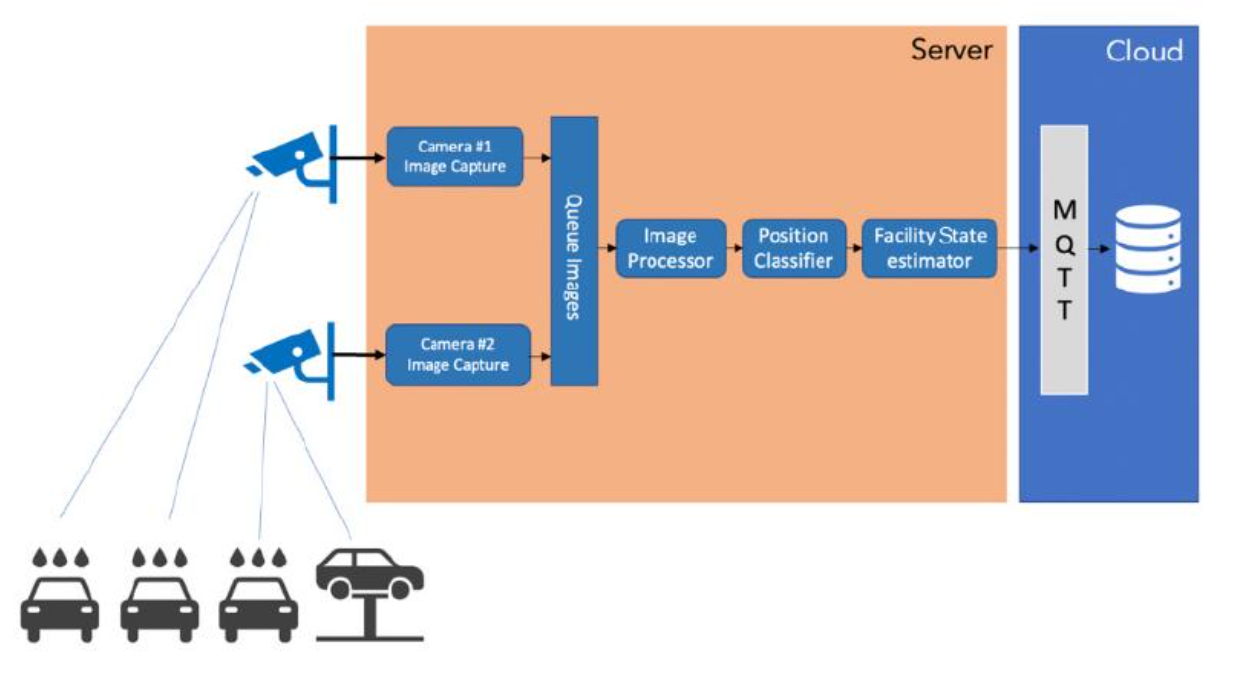


L'application est fragmentée en plusieurs services de la manière suivante :

* Collecteur de flux vidéo.

* Processeur d'images : il agrège les images - il reçoit, traite et met en cache les images et génère des paquets pour un traitement ultérieur.

* Classeur de position : Estime la position d'une voiture (tête ou queue) garée dans l'installation de réparation.

* Estimateur de configuration d'installation : il reçoit de manière asynchrone les estimations de position de voiture et calibre la configuration de l'installation et envoie des données en temps réel au cloud. 

* Le cloud collecte et stocke des données à l'aide de MQTT (un protocole réseau léger standard de publication-abonnement qui transporte les messages entre les appareils). Les données sont représentées sur un tableau de bord permettant aux exploitants d'installations automobiles d'analyser les opérations


Toutes les communications entre chaque microservice sont facilitées à l'aide d'API. Les avantages de l'architecture de microservice sont que si l'un des services tombe en panne ou si des erreurs se produisent, ce microservice particulier est généré pour remplacer celui qui a échoué afin de maintenir l'ensemble du service en cours d'exécution. Deuxièmement, chaque microservice peut être maintenu et amélioré en continu par une équipe dédiée (de data scientists, de développeurs et d'ingénieurs DevOps), contrairement aux équipes de coordination, pour travailler sur un système monolithique

## Old is gold – Microservices basés sur l'API REST

Old is gold. De plus, il est préférable de commencer quelque part où il existe différents protocoles API. Le protocole REST (Representational State Transfer) est devenu la référence absolue pour de nombreuses applications au fil des ans, et il n'est pas si différent pour les applications ML aujourd'hui. La majorité des entreprises préfèrent développer leurs applications ML basées sur le protocole API REST.

Une API REST ou API RESTful est basée sur REST, une méthode architecturale utilisée pour communiquer principalement dans le développement de services Web. Les API RESTful sont largement utilisées ; des entreprises telles qu'Amazon, Google, LinkedIn et Twitter les utilisent. Servir nos modèles de ML via des API RESTful présente de nombreux avantages, tels que les suivants :


* Fournir des prédictions à la volée à plusieurs utilisateurs.

* Ajouter plus d'instances pour faire évoluer l'application derrière un équilibreur de charge.
* Combiner éventuellement plusieurs modèles en utilisant différents points de terminaison d'API.

* Séparez notre environnement d'exploitation modèle de l'environnement orienté utilisateur.

* Activez une architecture basée sur des microservices. Ainsi, les équipes peuvent travailler de manière indépendante pour développer et améliorer les services

Une API RESTful utilise des méthodologies HTTP existantes définies par le protocole RFC 2616. Le tableau 8.2 résume les méthodes HTTP en combinaison avec leurs opérations CRUD et leur objectif dans les applications ML

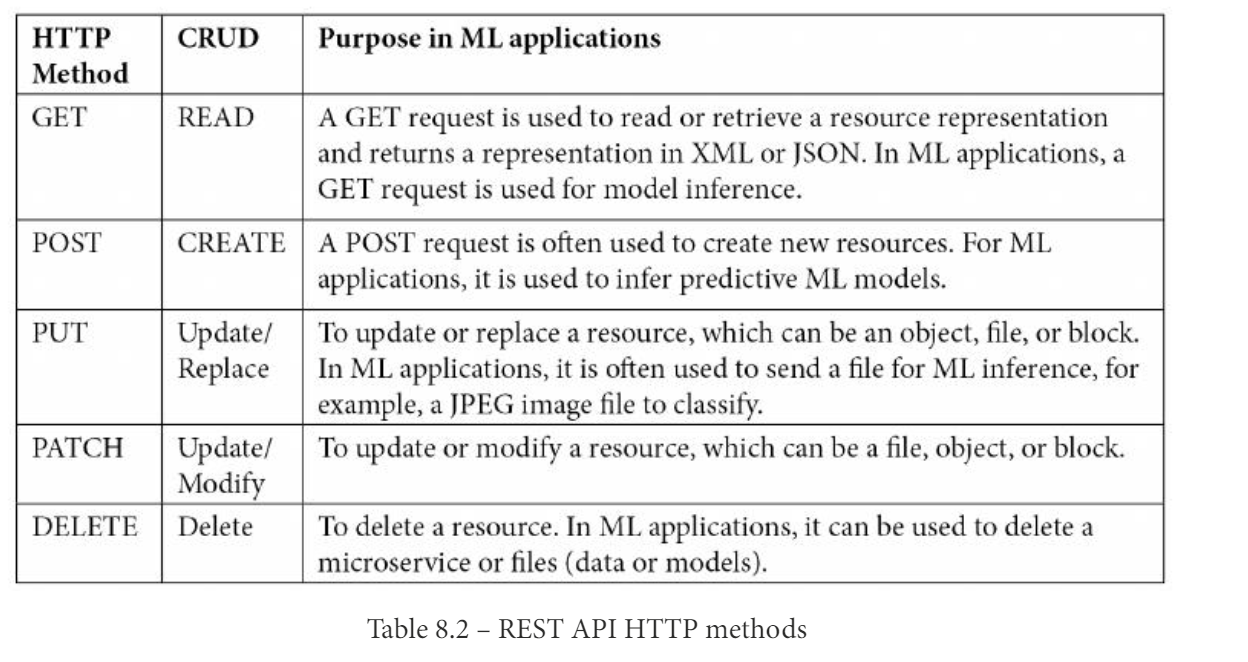

Les méthodes HTTP fondamentales sont GET, POST, PUT, PATCH et DELETE. Ces méthodes correspondent aux opérations CRUD telles que créer, lire, mettre à jour et supprimer. En utilisant ces méthodes, nous pouvons développer des API RESTful pour servir les modèles ML. 

Les API RESTful ont été largement adoptées grâce à des pilotes tels que OpenAPI. La spécication OpenAPI est un format de description d'API REST standardisé. C'est devenu un format standardisé pour les humains et les machines ; il permet la compréhension de l'API REST et fournit des outils étendus tels que la validation de l'API, les tests et un générateur de documentation interactif. En pratique, le fichier OpenAPI vous permet de décrire une API entière avec des informations critiques telles que les suivantes :

* Points de terminaison disponibles (/names) et opérations sur chaque point de terminaison (GET /names, POST /names)

* Entrée et sortie pour chaque opération (paramètres de fonctionnement)

*  Méthodes d'authentification
* Documentation du développeur
* Conditions d'utilisation, licence et autres informations

Vous pouvez en savoir plus sur OpenAPI sur ce site : https://swagger.io/specification/. Dans la section suivante, nous développerons un API RESTful pour servir un modèle ML et le tester à l'aide d'une interface basée sur OpenAPI appelée Swagger UI

## Implémentation pratique du service d'un modèle ML en tant qu'API

Dans cette section, nous appliquerons les principes des API et des microservices que nous avons appris précédemment (dans la section Introduction aux API et aux microservices) et développerons un service d'API RESTful pour servir le modèle ML . Le modèle de ML que nous servirons sera pour le problème commercial (prévision météorologique à l'aide de ML) sur lequel nous avons travaillé précédemment. Nous utiliserons le framework FastAPI pour servir le modèle en tant qu'API et Docker pour conteneuriser le service API dans un microservice. FastAPI est un framework pour le déploiement de modèles ML. Il est facile et rapide à coder et permet des performances élevées avec des fonctionnalités telles que les appels asynchrones et les contrôles d'intégrité des données. FastAPI est facile à utiliser et suit la spécification OpenAPI, ce qui facilite le test et la validation des API. En savoir plus sur FastAPI ici : https://fastapi.tiangolo.com/.

## Conception et développement d'API 

Nous développerons le service API et l'exécuterons sur un ordinateur local. (Cela pourrait également être développé sur la machine virtuelle que nous avons créée précédemment dans l'espace de travail Azure Machine Learning. Pour l'apprentissage, il est recommandé de le pratiquer localement pour plus de facilité.) Pour commencer, clonez le référentiel de livres sur votre PC ou ordinateur portable et accédez à le dossier 08_API_Microservices. Nous utiliserons ces fichiers pour construire le service API :

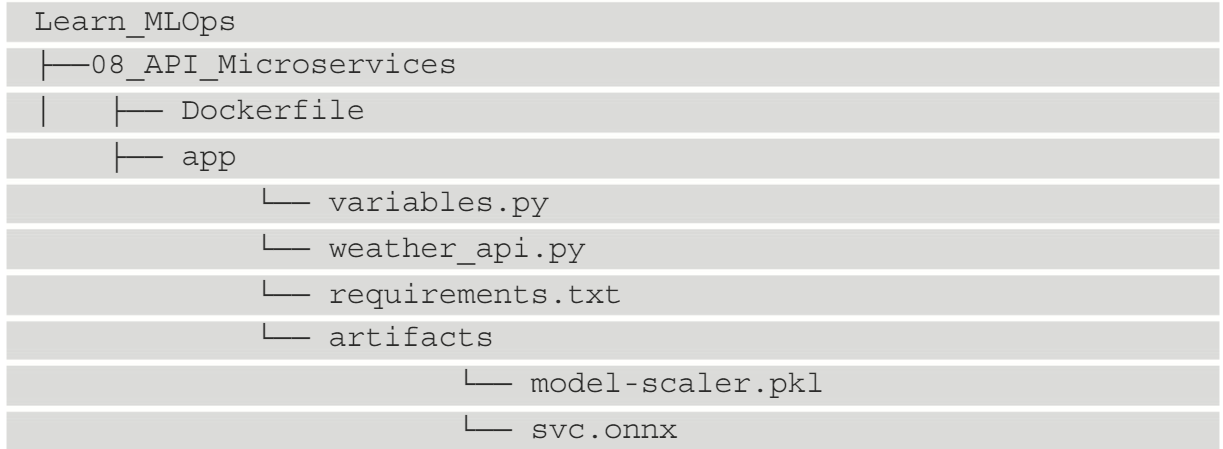

Les fichiers répertoriés dans l'arborescence de répertoires pour le dossier 08_API_Microservices incluent un fichier Docker (utilisé pour créer une image et un conteneur Docker à partir du service FASTAPI) et un dossier nommé app. Le dossier de l'application contient les fichiers weather_api.py (contient le code des définitions des points de terminaison de l'API), variables.py (contient la définition des variables d'entrée) et requirements.txt (contient les packages Python nécessaires à l'exécution du service API ) et un dossier avec des artefacts de modèle tels qu'un scaler de modèle (utilisé pour mettre à l'échelle les données entrantes) et un fichier de modèle sérialisé (svc.onnx). 

Le modèle a été sérialisé auparavant, au stade de la formation et de l'évaluation du modèle, comme on le voit au chapitre 5, Évaluation et emballage du modèle. Le modèle est téléchargé et placé dans le dossier du registre de modèles dans l'espace de travail Azure Machine Learning (Learn_MLOps), comme illustré à la figure 8.3.

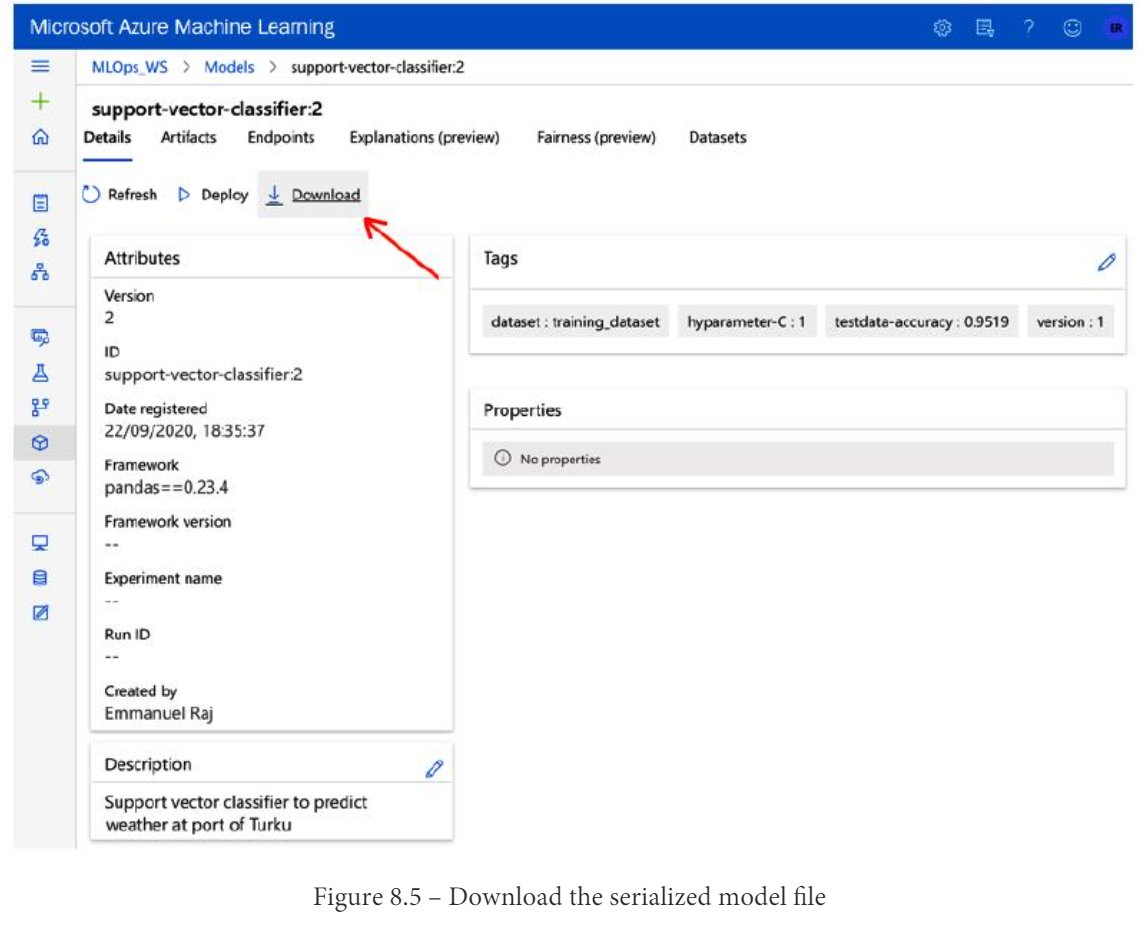


Vous pouvez remplacer les fichiers svc.onnx et model-scalar.pkl par les fichiers que vous avez formés dans votre espace de travail Azure Machine Learning ou bien continuer à utiliser ces fichiers pour une expérimentation rapide. Nous allons maintenant examiner le code de chaque fichier. Commençons par variables.py


### variables.py

Nous n'utilisons qu'un seul package pour définir les variables d'entrée. Le package que nous utilisons s'appelle pydantic ; il s'agit d'un package de validation des données et de gestion des paramètres utilisant des annotations de type Python. En utilisant pydantic, nous allons définir des variables d'entrée dans la classe nommée WeatherVariables utilisée pour le service fastAPI :





In [ ]:
from pydantic import BaseModel

class WeatherVariables(BaseModel):
                        temp_c: float 
                        humidity: float 
                        wind_speed_kmph: float 
                        wind_bearing_degree: float
                        visibility_km: float 
                        pressure_millibars: float 
                        current_weather_condition: 

Dans la classe WeatherVariables, définissez les variables et leurs types comme indiqué dans le code précédent. Les mêmes variables qui ont été utilisées pour l'apprentissage du modèle au chapitre 4, Pipelines d'apprentissage automatique, seront utilisées pour l'inférence. Nous définissons ici ces variables d'entrée comme temp_c, humidité, wind_speed_kmph, wind_bearing_degree, visibilité_km, pressure_millibars et current_weather_condition. Les types de données pour ces variables sont définis comme flottants. Nous allons importer la classe WeatherVariables et utiliser les variables d'entrée définies dans le service fastAPI. Regardons comment nous pouvons utiliser les variables définies dans la classe WeatherVariables dans le service fastAPI en utilisant le fichier Weather_api.py


## Weather_api.py

Ce fichier Weather_api.py est utilisé pour définir le service fastAPI. Les artefacts de modèle nécessaires sont importés et utilisés pour servir les points de terminaison de l'API afin de déduire le modèle pour faire des prédictions en temps réel ou en production : 


1. Nous commençons par importer les packages requis comme suit :

In [ ]:
import uvicorn
from fastapi import FastAPI
from variables import WeatherVariables
import numpy
import pickle
import pandas as pd
import onnxruntime as rt

Nous avons importé les packages requis, tels que uvicorn (un package d'implémentation de serveur ASGI), fastapi, numpy, pickle, pandas et onnxruntime (utilisé pour désérialiser et déduire les modèles onnx)


2. Ensuite, nous créons un objet d'application. Vous remarquerez certaines similitudes syntaxiques de fastAPI avec le framework Web Flask (si vous avez déjà utilisé Flask). Par exemple, à l'étape suivante, nous créons l'objet d'application à l'aide de la fonction FastAPI() pour créer l'objet d'application. La création d'un objet d'application est similaire à la façon dont nous procédons via l'exemple Flask : à partir de Flask, importez Flask puis nous utilisons la fonction Flask pour créer l'objet d'application de la manière app = Flask (). Vous remarquerez de telles similitudes lorsque nous créons des points de terminaison d'API à l'aide de fastAPI :

In [ ]:
# Create app object 
app = FastAPI()

# Load model scalar
pickle_in = open("artifacts/model-scaler.pkl", "rb")
scaler = pickle.load(pickle_in)

# Load the model
sess = rt.InferenceSession("artifacts/svc.onnx")
input_name = sess.get_inputs()[0].name
label_name = sess.get_outputs()[0].name

3. Après avoir créé l'objet d'application, nous importerons les artefacts de modèle nécessaires pour l'inférence dans les points de terminaison. Pickle est utilisé pour désérialiser le fichier model-scaler.pkl du data scaler. Ce fichier a été utilisé pour entraîner le modèle (au chapitre 4, Pipelines d'apprentissage automatique), et nous allons maintenant l'utiliser pour mettre à l'échelle les données entrantes avant l'inférence du modèle. Nous utiliserons le modèle de classificateur de vecteurs de support précédemment formé, qui a été sérialisé dans le fichier nommé scv.onnx (nous pouvons accéder au fichier et le télécharger comme illustré à la figure 8.3).


4. ONNX Runtime est utilisé pour charger le modèle sérialisé dans des sessions d'inférence (input_name et label_name) pour faire des prédictions de modèle ML. Ensuite, nous pouvons passer à la partie centrale de la définition des points de terminaison de l'API pour déduire le modèle ML. Pour commencer, nous faisons une requête GET à la route d'index en utilisant la fonction wrapper @app.get('/'):

In [ ]:
# API Endpoints
@app.get('/')
def index():
    return {'Hello': 'Welcome to weather prediction service, access the api docs and test the API at http://0.0.0.0/docs.'}

Une fonction nommée index() est dénie pour la route d'index. Il renvoie le message de bienvenue, pointant vers le lien docs. Ce message vise à guider les utilisateurs vers le lien docs pour accéder et tester les points de terminaison de l'API

5. Ensuite, nous allons définir le point de terminaison principal de l'API, /predict, qui est utilisé pour déduire le modèle ML. Une fonction wrapper, @app.post('/predict'), est utilisée pour faire une requête POST :

In [ ]:
@app.post('/predict')
def predict_weather(data: WeatherVariables):
    data = data.dict()

    # fetch input data using data varaibles
    temp_c = data['temp_c']
    humidity = data['humidity']
    wind_speed_kmph = data['wind_speed_kmph']
    wind_bearing_degree = data['wind_bearing_degree']
    visibility_km = data['visibility_km']
    pressure_millibars = data['pressure_millibars']
    current_weather_condition = data['current_weather_condition']

Une fonction nommée predict_weather() est lancée pour le point de terminaison /predict. À l'intérieur de la fonction, nous avons créé une variable appelée data qui capturera les données d'entrée ; cette variable capture les données JSON que nous obtenons via la requête POST et pointe vers WeatherVariables. Dès que nous effectuons la requête POST, toutes les variables des données entrantes seront mappées sur des variables de la classe WeatherVariables à partir du fichier variables.py


6. Ensuite, nous convertissons les données dans un dictionnaire, récupérons chaque variable d'entrée du dictionnaire et les compressons dans une variable de tableau numpy, data_to_pred. Nous utiliserons cette variable pour mettre à l'échelle les données et déduire le modèle ML

In [ ]:
 data_to_pred = numpy.array([[temp_c, humidity, wind_speed_kmph, wind_bearing_degree,
                                 visibility_km, pressure_millibars, current_weather_condition]])

    # Scale input data
    data_to_pred = scaler.fit_transform(data_to_pred.reshape(1, 7))

    # Model inference
    prediction = sess.run(
        [label_name], {input_name: data_to_pred.astype(numpy.float32)})[0]

Les données (data_to_pred) sont remodelées et mises à l'échelle à l'aide du scaler chargé précédemment à l'aide de la fonction fit_transform()


7. Ensuite, l'étape d'inférence du modèle, qui est l'étape clé, est effectuée en inférant des données mises à l'échelle au modèle, comme indiqué dans le code précédent. La prédiction déduite du modèle est ensuite renvoyée en sortie à la variable de prédiction :

In [ ]:
if(prediction[0] > 0.5):
        prediction = "Rain"
    else:
        prediction = "No_Rain"
    return {
        'prediction': prediction
    }

Enfin, nous allons convertir l'inférence du modèle dans un format lisible par l'homme en suggérant rain ou no_rain en fonction des prédictions du modèle ML et renvoyer la prédiction de l'appel POST au point de terminaison /predict. Cela nous amène à la fin du fichier weather_api.py. Lorsqu'une requête POST est effectuée en passant des données d'entrée, le service renvoie la prédiction du modèle sous la forme 0 ou 1. Le service renvoie rain ou not_rain en fonction de la prédiction du modèle. Lorsque vous obtenez une telle prédiction, votre service fonctionne et est suffisamment robuste pour répondre aux besoins de production.

## Requirement.txt 
est un fichier texte contenant tous les packages nécessaires à l'exécution du service fastAPI :



    numpy
    fastapi
    uvicorn
    scikit-learn==0.20.3
    pandas
    onnx
    onnxruntime


Ces packages doivent être installés dans l'environnement dans lequel vous souhaitez exécuter le service API. Nous utiliserons numpy, fastapi (un framework ML pour créer des API robustes), uvicorn (un serveur AGSI), scikit-learn, pandas, onnx et onnxruntime (pour désérialiser et déduire des modèles onnx) pour exécuter le service FastAPI. Pour déployer et exécuter le service API de manière standardisée, nous utiliserons Docker pour exécuter le service FastAPI dans un conteneur Docker. Voyons ensuite comment créer un Dockerle pour le service

## Développer un microservice à l'aide de Docker

Dans cette section, nous allons packager le service FastAPI de manière standardisée à l'aide de Docker. De cette façon, nous pouvons déployer l'image ou le conteneur Docker sur la cible de déploiement de votre choix en 5 minutes environ. Docker présente plusieurs avantages, tels que la réplicabilité, la sécurité, la simplicité de développement, etc. Nous pouvons utiliser l'image officielle Docker de fastAPI (tiangolo/uvicorn-gunicorn-fastapi) de Docker Hub. Voici un extrait du Dockerfile


    FROM tiangolo/uvicorn-gunicorn-fastapi:python3.7
    COPY ./app /app
    RUN pip install -r requirements.txt
    EXPOSE 80
    CMD ["uvicorn", "weather_api:app", "--host", "0.0.0.0", "--port", "80"]



Tout d'abord, nous utilisons une image officielle fastAPI Docker de Docker Hub en utilisant la commande FROM et en pointant sur l'image - tiangolo/uvicorn-gunicorn-fastapi:python3.7. L'image utilise Python 3.7, qui est compatible avec fastAPI. Ensuite, nous copions le dossier de l'application dans un répertoire nommé app à l'intérieur de l'image/conteneur docker. Après la copie de l'application du dossier dans l'image/le conteneur Docker, nous installerons les packages nécessaires répertoriés dans le fichier requirements.txt à l'aide de la commande RUN. Comme le serveur uvicorn (serveur AGSI) pour fastAPI utilise le port 80 par défaut, nous EXPOSErons le port 80 pour l'image/le conteneur Docker. Enfin, nous allons faire tourner le serveur à l'intérieur de l'image/du conteneur Docker à l'aide de la commande CMD « uvicorn weather_api:app –host 0.0.0.0 –port 80 ». Cette commande pointe vers le fichier weather_api.py pour accéder à l'objet d'application fastAPI pour le service et l'héberger sur le port 80 de l'image/du conteneur. Félicitations, vous y êtes presque. Nous allons maintenant tester l'état de préparation du microservice et voir s'il fonctionne et comment

## Test de l'API 
Pour tester la préparation de l'API, nous allons effectuer les étapes suivantes :

1. Commençons par créer l'image Docker. Pour cela, une condition préalable est d'avoir installé Docker. Accédez à votre terminal ou à votre invite de commande et clonez le référentiel à l'emplacement souhaité et accédez au dossier 08_API_Microservices. Exécutez la commande Docker suivante pour créer l'image Docker :



    docker build -t fastapi .


L'exécution de la commande build commencera à créer l'image Docker en suivant les étapes répertoriées dans le Dockerle. L'image est taguée avec le nom fastapi. Après l'exécution réussie de la commande build, vous pouvez valider si l'image est construite et balisée avec succès ou non à l'aide de la commande docker images. Il affichera les informations comme suit, après avoir réussi à créer l'image


2. Exécutez un conteneur Docker localement. Maintenant, nous pouvons générer un conteneur Docker en cours d'exécution à partir de l'image Docker créée précédemment. Pour exécuter un conteneur Docker, nous utilisons la commande RUN


    docker run -d –name weathercontainer -p 80:80 fastapi

Un conteneur Docker est généré à partir de l'image Fastapi Docker. Le nom du conteneur en cours d'exécution est weathercontainer et son port 80 est mappé sur le port 80 de l'ordinateur local. Le conteneur s'exécutera en arrière-plan comme nous avons utilisé -d dans la commande RUN. Lors de l'exécution réussie d'un conteneur, un ID de conteneur est affiché sur le terminal, par exemple, 2729ff7a385b0a255c63cf03ec9b0e1411ce4426c9c49e8db 4883e0cf0fde567


3. Testez le service API à l'aide d'exemples de données. Nous allons vérifier si le conteneur fonctionne avec succès ou non. Pour vérifier cela, utilisez la commande suivante


    docker container ps


Cela listera tous les conteneurs en cours d'exécution comme suit :

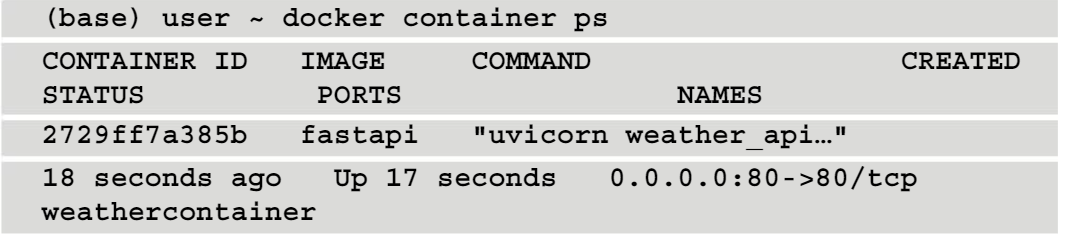

Nous pouvons voir que le conteneur de l'image fastapi est mappé et s'exécute avec succès sur le port 80 de la machine locale. Nous pouvons accéder au service et le tester depuis le navigateur sur notre machine locale à l'adresse 0.0.0.0:80.


FastAPI utilise la spécication OpenAPI (en savoir plus : https://www.openapis.org/, https://swagger.io/specification/) pour servir le modèle. La spécification OpenAPI (OAS) est une interface standard indépendante du langage pour les API RESTful. En utilisant les fonctionnalités OpenAPI, nous pouvons accéder à la documentation de l'API et obtenir une vue d'ensemble de l'API. Vous pouvez accéder à la documentation de l'API et tester l'API à 0.0.0.0:80/docs et cela vous dirigera vers une interface utilisateur basée sur Swagger (elle utilise l'OAS) pour tester votre API.


4. Maintenant, testez le point de terminaison /predict (en sélectionnant le point de terminaison et en cliquant sur le bouton Essayer) à l'aide des données d'entrée de votre choix, comme illustré à la Figure 8.6 :


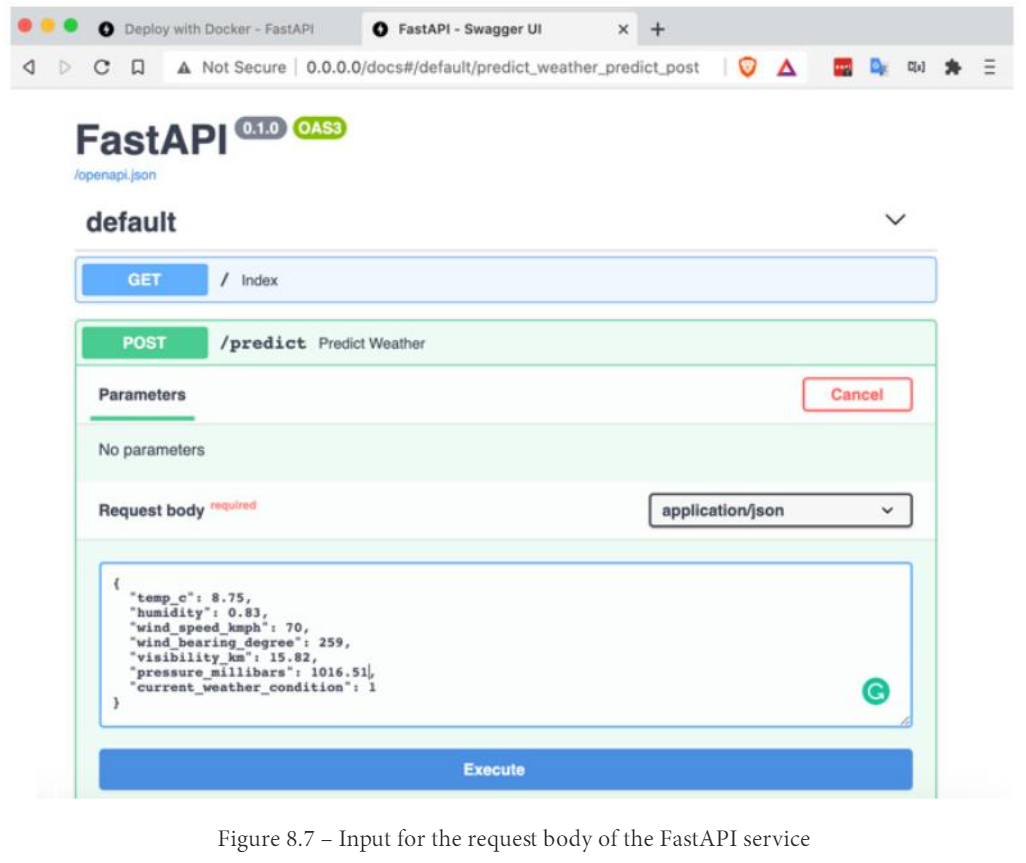

5. Cliquez sur Exécuter pour effectuer un appel POST et tester le point de terminaison. L'entrée est déduite du modèle dans le service et la prédiction du modèle Rain ou No_Rain est la sortie de l'appel POST, comme le montre la figure 8.7 :

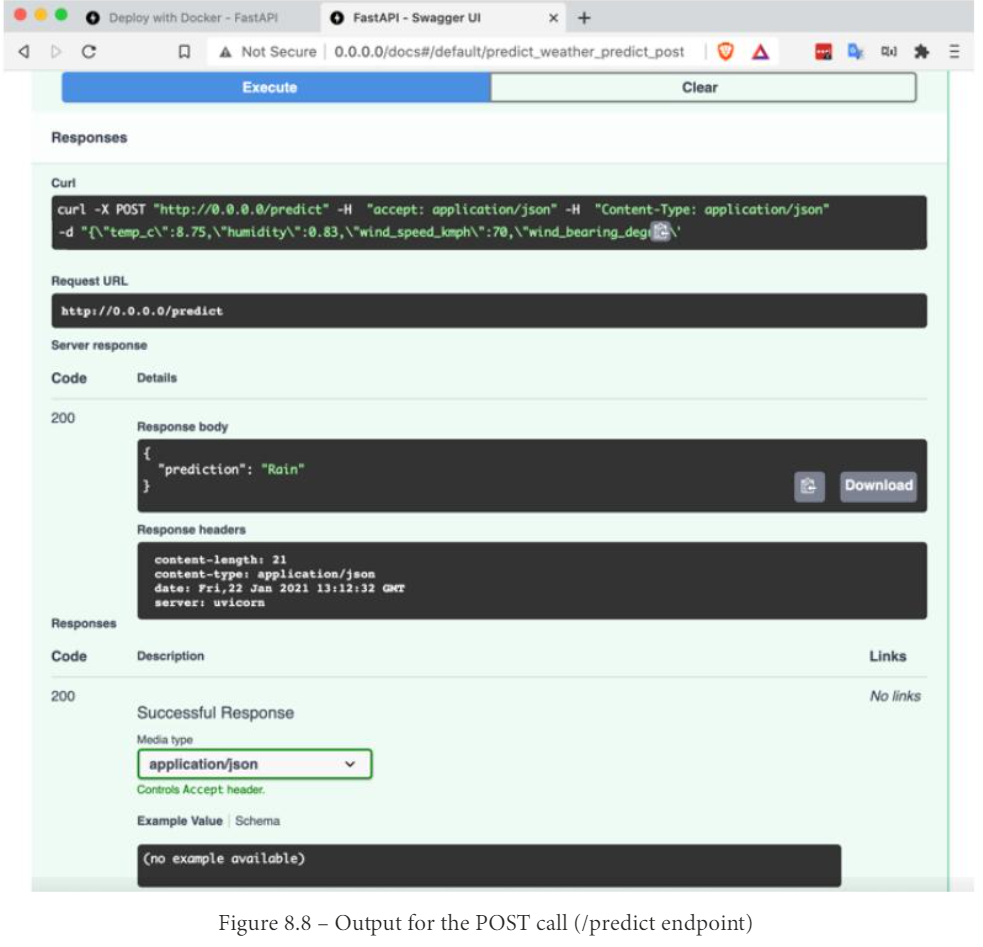

L'exécution réussie de l'appel POST pour l'API /predict entraînera la prédiction du modèle de sortie, comme illustré à la figure 8.6. Le modèle exécuté dans le conteneur Docker génère la condition météo sous forme de pluie pour l'appel POST. Félicitations, vous avez créé avec succès un conteneur fastAPI et l'avez testé. Cet exercice devrait vous avoir doté des compétences nécessaires pour créer, déployer et tester des services d'API basés sur le ML pour vos cas d'utilisation

## Résumé


Dans ce chapitre, nous avons appris les principes clés de la conception d'API et du déploiement de microservices en production. Nous avons abordé les bases des méthodes de conception d'API et découvert FastAPI. Pour notre problème commercial, nous avons appris en réalisant une implémentation pratique du développement d'un service API dans l'implémentation pratique consistant à servir un modèle ML en tant que section API à l'aide de FastAPI et Docker. En utilisant les connaissances pratiques acquises dans ce chapitre, vous pouvez concevoir et développer des services API robustes pour servir vos modèles de ML. Le développement de services d'API pour les modèles ML est un tremplin pour mettre les modèles ML en production. 

Dans le chapitre suivant, nous approfondirons les concepts de test et de sécurité. Nous allons implémenter une méthode de test pour tester la robustesse d'un service API utilisant Locust. Allons-y!